In [2]:
from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot
import numpy as np
import os
import sys
import textwrap
import itertools
import ants
import warnings

import sys
import os

sys.path.append('/g/data/gb02/pag548/UM_config_tools/UM_config_tools')

In [3]:
from plot_ancillaries import plot_ancils, collapse_cube

In [6]:
home_dir=os.environ['HOME']
HOME=Path(home_dir)

ROSE_STD='u-dq124'
ROSE_WC='u-dq487'

In [69]:
# Look at the 1 km vegetation files with standard and world cover inputs
STD_VEG = Path( HOME / 'cylc-run' / ROSE_STD / 'share/data/ancils/Flagship_ERA5to1km/1km/qrparm.veg.frac_cci')
WC_VEG = Path( HOME / 'cylc-run' / ROSE_WC / 'share/data/ancils//Flagship_ERA5to1km/1km-WC/qrparm.veg.frac_cci')

In [83]:
std_data = ants.load(STD_VEG)
wc_data = ants.load(WC_VEG)

std_da = xr.DataArray.from_iris(std_data[0])
wc_da = xr.DataArray.from_iris(wc_data[0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [88]:
def return_cb_args(da):

    if 'standard_name' in da.attrs.keys():
        split = textwrap.wrap(da.attrs['standard_name'].replace('_',' '),max_label_length)
        label = '\n'.join(split)
        cb_args = {'label': label}
    else:
        cb_args = {'label':da.attrs['STASH']}

    return cb_args

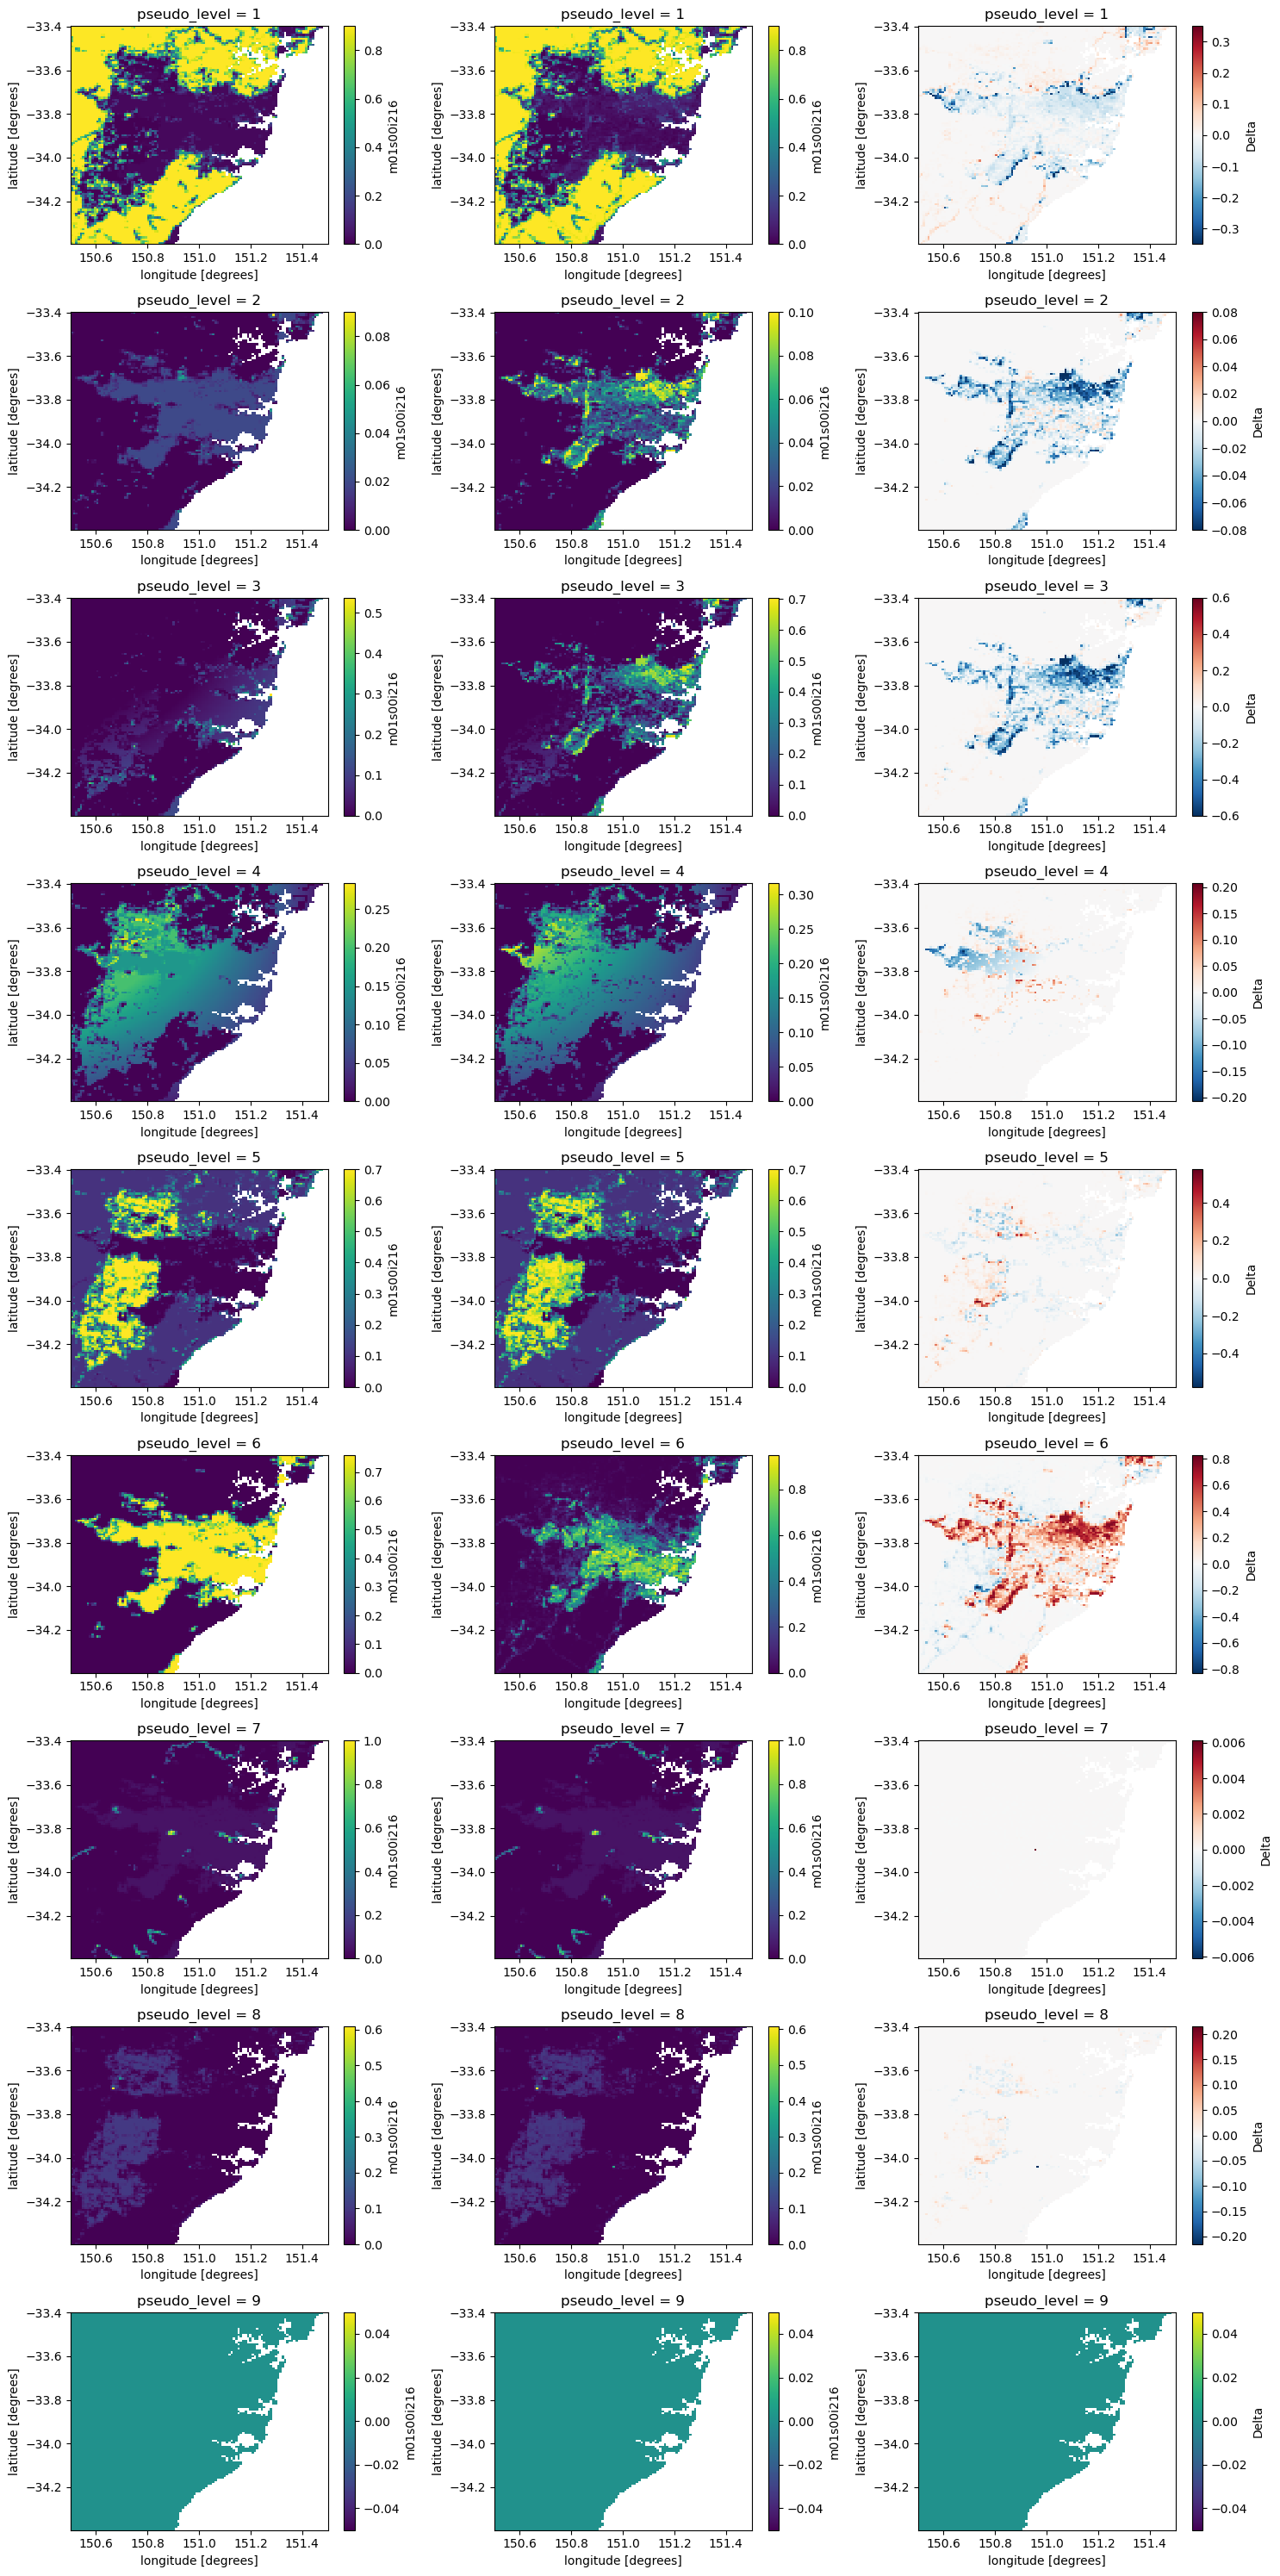

In [91]:
fig,ax=plt.subplots(9,3,figsize=(15,30))

max_label_length=30

for level in range(9):
    std_chunk = std_da.sel(dim_0=level,latitude=slice(-34.4,-33.4),longitude=slice(150.5,151.5))
    wc_chunk = wc_da.sel(dim_0=level,latitude=slice(-34.4,-33.4),longitude=slice(150.5,151.5))
    
    std_chunk.plot(ax=ax[level,0],cbar_kwargs=return_cb_args(std_chunk))
    wc_chunk.plot(ax=ax[level,1],cbar_kwargs=return_cb_args(std_chunk))
    (std_chunk-wc_chunk).plot(ax=ax[level,2],cbar_kwargs={'label':'Delta'})

plt.tight_layout()
plt.savefig('Delta_veg_frac_cci.png')

In [92]:
# Repeat for urb2t data
STD_VEG = Path( HOME / 'cylc-run' / ROSE_STD / 'share/data/ancils/Flagship_ERA5to1km/1km/qrparm.veg.frac.urb2t')
WC_VEG = Path( HOME / 'cylc-run' / ROSE_WC / 'share/data/ancils//Flagship_ERA5to1km/1km-WC/qrparm.veg.frac.urb2t')

In [93]:
std_data = ants.load(STD_VEG)
wc_data = ants.load(WC_VEG)

std_da = xr.DataArray.from_iris(std_data[0])
wc_da = xr.DataArray.from_iris(wc_data[0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


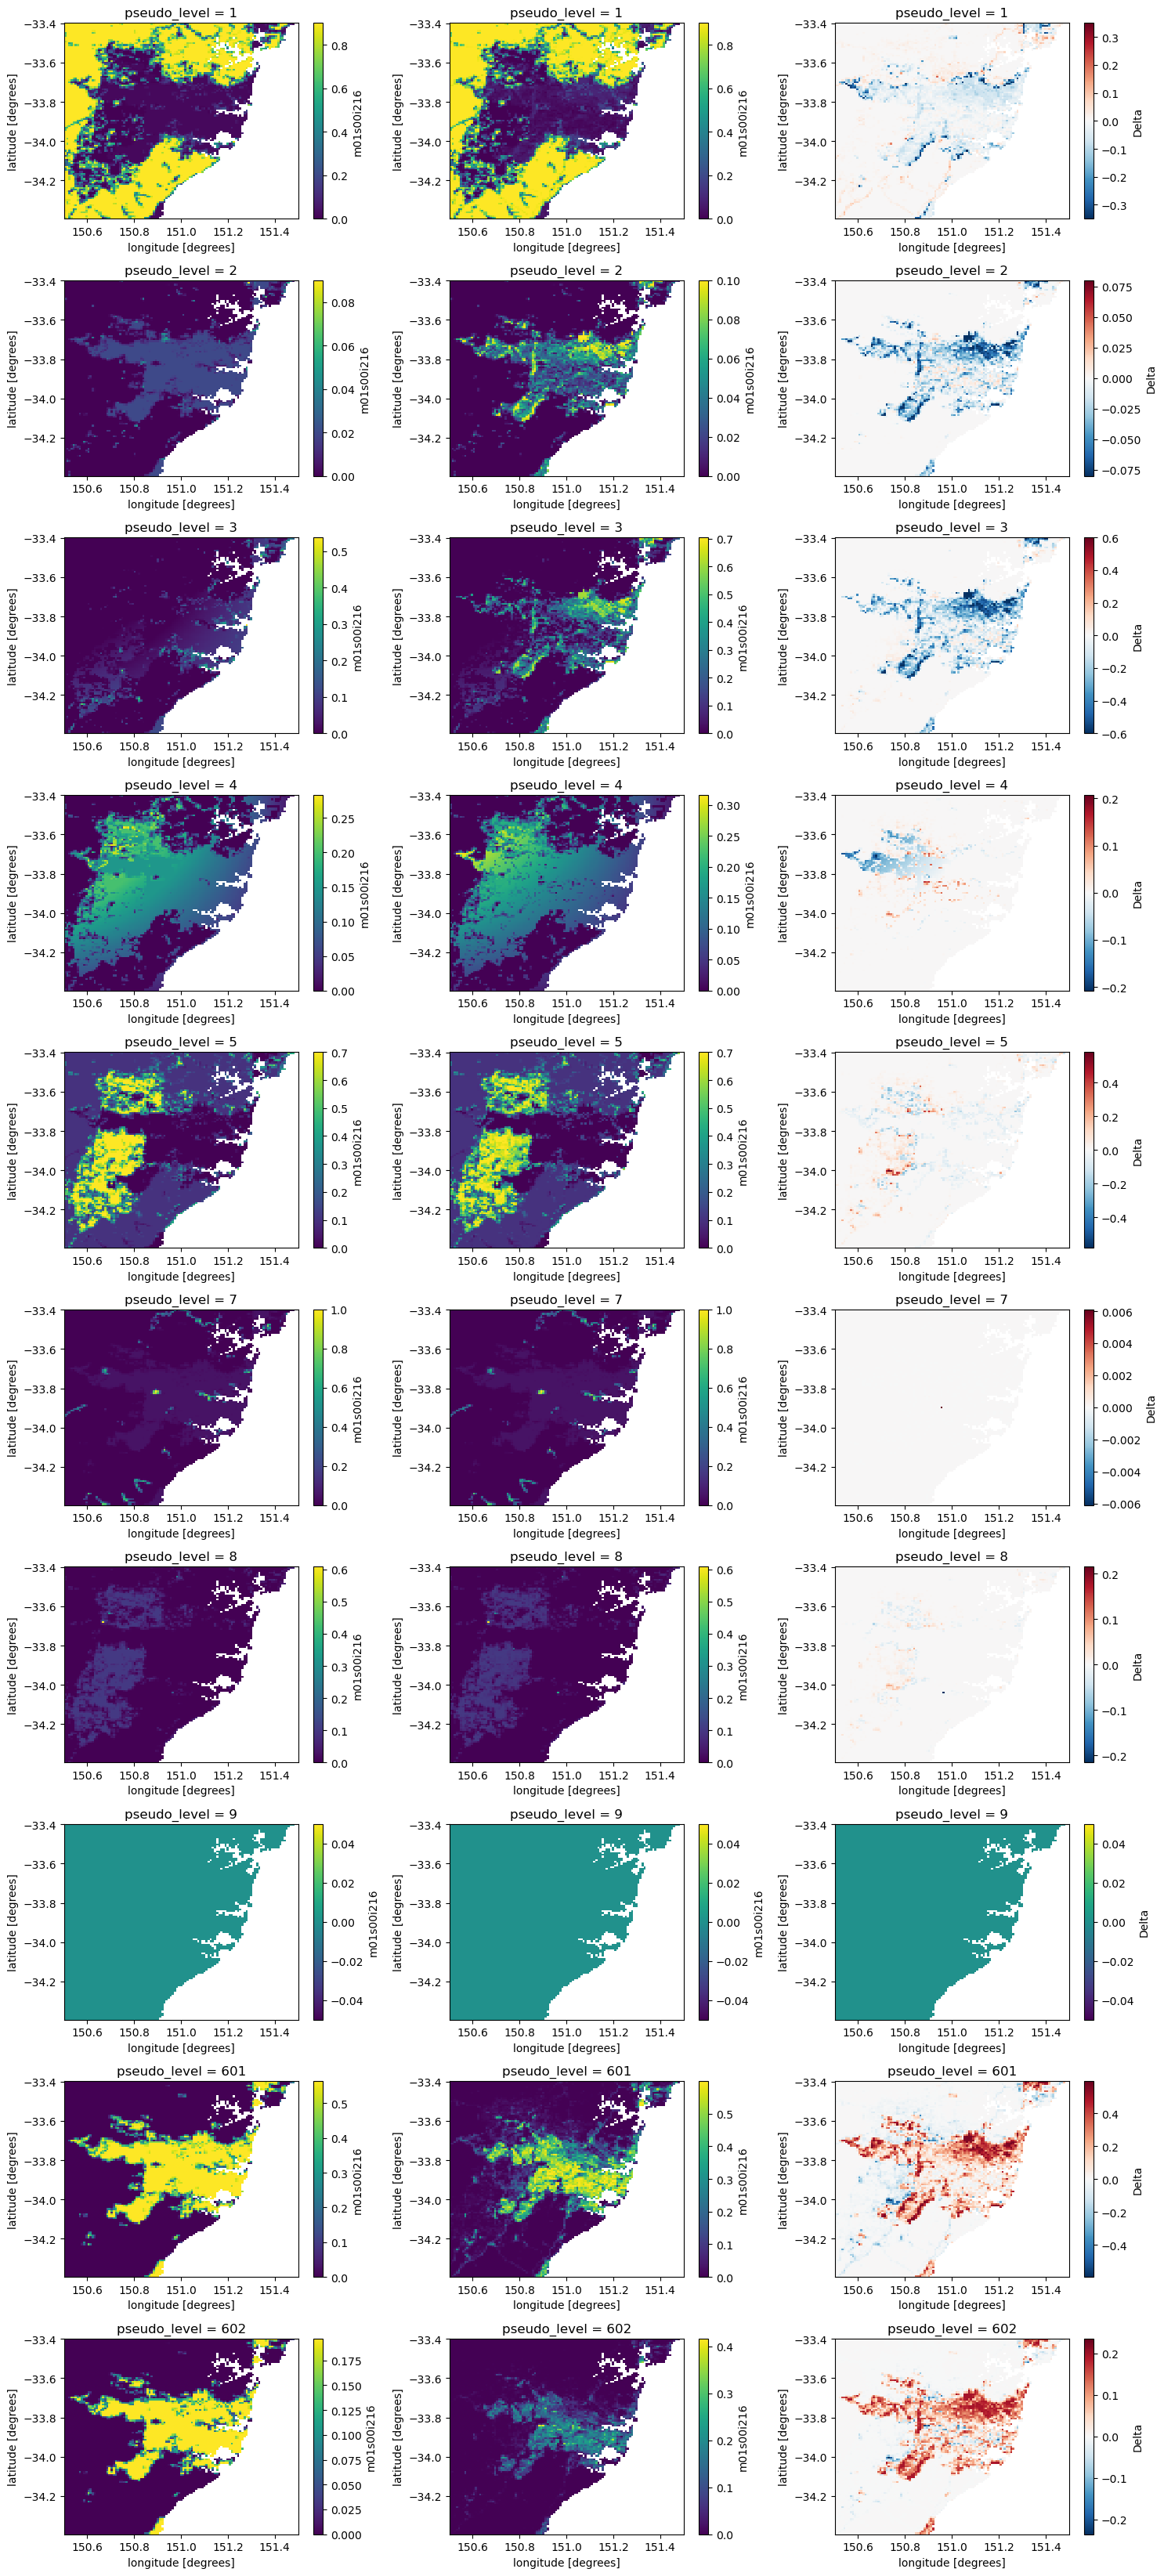

In [96]:
fig,ax=plt.subplots(10,3,figsize=(15,33))

max_label_length=30

for level in range(10):
    std_chunk = std_da.sel(dim_0=level,latitude=slice(-34.4,-33.4),longitude=slice(150.5,151.5))
    wc_chunk = wc_da.sel(dim_0=level,latitude=slice(-34.4,-33.4),longitude=slice(150.5,151.5))
    
    std_chunk.plot(ax=ax[level,0],cbar_kwargs=return_cb_args(std_chunk))
    wc_chunk.plot(ax=ax[level,1],cbar_kwargs=return_cb_args(std_chunk))
    (std_chunk-wc_chunk).plot(ax=ax[level,2],cbar_kwargs={'label':'Delta'})

plt.tight_layout()
plt.savefig('Delta_veg_frac_urb2t.png')